# Exploratory Data Analysis 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df= pd.read_excel("ReviewFinal.xlsx")

In [2]:
df.head(1)

,Unnamed: 0,user_id,name_reviewer,rating,review,gmap_id,estado,name_business,address,description,...,category 3,category 4,category 5,category 6,category 7,category 8,category 9,category 10,__index_level_0__,dispersion_score
0,0,1.000002e+20,Jason W,5,Small little place with some good wine and gre...,0x80c295684df80c71:0xcb2ceac4044a65c5,California,Dargenzio Winery,"Dargenzio Winery, 1204 W Burbank Blvd, Burbank...",Charming locale with a warm atmosphere for tas...,...,Bar restaurant furniture store,None,None,None,None,None,None,None,69209,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153076 entries, 0 to 153075
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         153076 non-null  int64  
 1   user_id            153076 non-null  float64
 2   name_reviewer      153075 non-null  object 
 3   rating             153076 non-null  int64  
 4   review             90484 non-null   object 
 5   gmap_id            153076 non-null  object 
 6   estado             153076 non-null  object 
 7   name_business      153076 non-null  object 
 8   address            152943 non-null  object 
 9   description        34269 non-null   object 
 10  latitude           153076 non-null  float64
 11  longitude          153076 non-null  float64
 12  avg_rating         153076 non-null  float64
 13  num_of_reviews     153076 non-null  int64  
 14  category 1         153076 non-null  object 
 15  category 2         153076 non-null  object 
 16  ca

In [4]:
# Cantidad de nulos por columna 
df.isnull().sum()

Unnamed: 0                0
user_id                   0
name_reviewer             1
rating                    0
review                62592
gmap_id                   0
estado                    0
name_business             0
address                 133
description          118807
latitude                  0
longitude                 0
avg_rating                0
num_of_reviews            0
category 1                0
category 2                0
category 3                0
category 4                0
category 5                0
category 6                0
category 7                0
category 8                0
category 9                0
category 10               0
__index_level_0__         0
dispersion_score          0
dtype: int64

#### Para poder trabajar con el modelo acordamos que a los nulos en reviews les ibamos a imputar el valor not descripcion ya que som los que mas nos afectan.

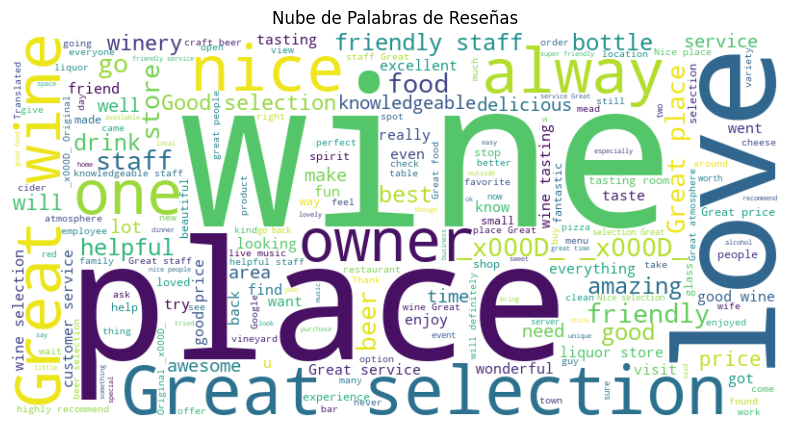

In [5]:
#Nube de Palabras con todas las reseñas

# Filtra los valores nulos en la columna 'review'
filtered_reviews = df['review'].dropna()

# Crea un solo string con todas las reseñas filtradas
all_reviews = " ".join(str(review) for review in filtered_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas')
plt.show()


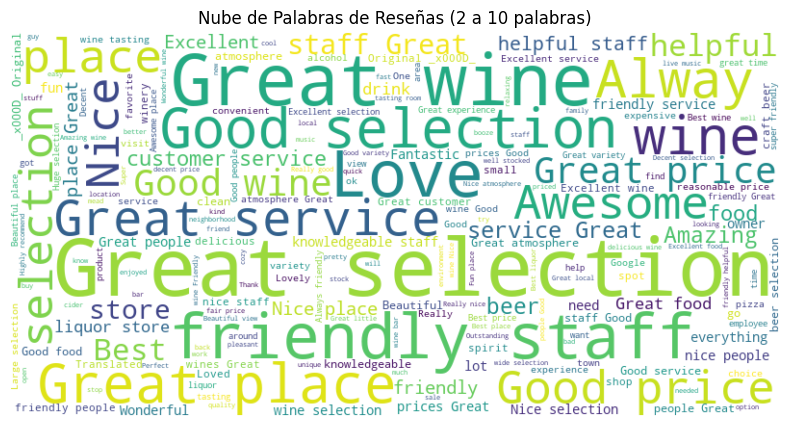

In [16]:
#Nube de Palabras de Reseñas solo con las que tengan de 2 a 10 palabras

# Filtra las reseñas por longitud (2 a 10 palabras)
filtered_reviews = df[df['review'].apply(lambda x: isinstance(x, str) and 2 <= len(x.split()) <= 10)]['review']

# Crea un solo string con todas las reseñas filtradas
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas (2 a 10 palabras)')
plt.show()


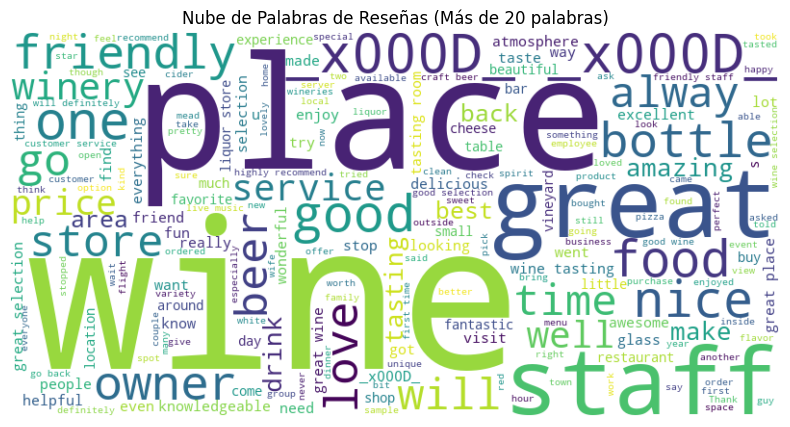

In [17]:
#Nube de Palabras de Reseñas de mas de 20 palabras

# Filtra las reseñas por longitud (más de 20 palabras)
filtered_reviews = df[df['review'].apply(lambda x: isinstance(x, str) and len(x.split()) > 20)]['review']

# Crea un solo string con todas las reseñas filtradas
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas (Más de 20 palabras)')
plt.show()


### Palabras mas usadas
Todas las reseñas:     
Wine                    
Place                   
Great selection         
Great wine              
Love                  
owner                   
Nice 

2 a 10 palabras:      
Wine                
Place                   
Great selection         
Great wine              
Love                    
owner                   
Nice                           

Mas de 20 palabras:
Place
Wine
Great
Good
Staff
Love  
Las que mas frecuencia tienen son las que aparece la palabra great, love y selection 

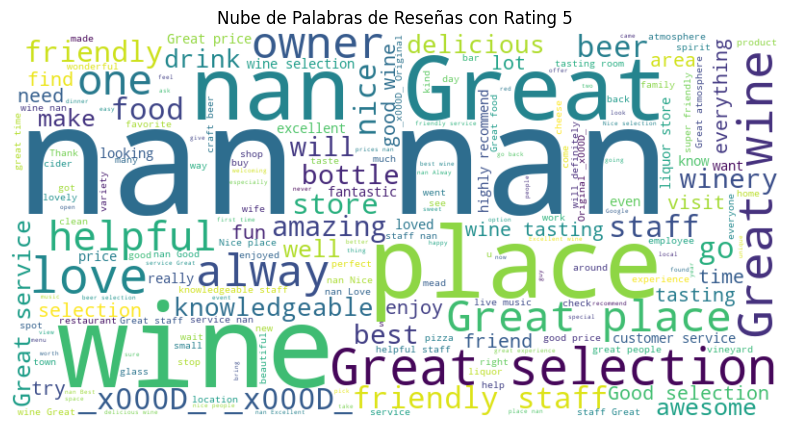

In [18]:
# Nube de Palabras de Reseñas con Rating 5
# Filtra las reseñas por rating igual a 5
filtered_reviews = df[df['rating'] == 5]['review']

# Crea un solo string con todas las reseñas filtradas
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas con Rating 5')
plt.show()


#### Se repite el patron comentado mas arriba con respecto a las palabras aqui se resalta la palabra place

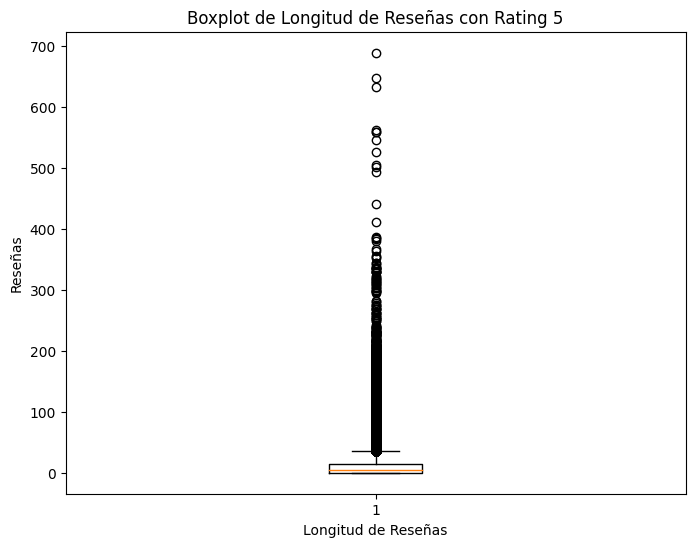

In [21]:
# Boxplot de Longitud de Reseñas con Rating 5
# Filtra las reseñas por rating igual a 5
filtered_reviews = df[df['rating'] == 5]['review']

# Crea una lista con la longitud de las reseñas
review_lengths = filtered_reviews.apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 6))
plt.boxplot(review_lengths, vert=True, showfliers=True)
plt.title('Boxplot de Longitud de Reseñas con Rating 5')
plt.xlabel('Longitud de Reseñas')
plt.ylabel('Reseñas')
plt.show()


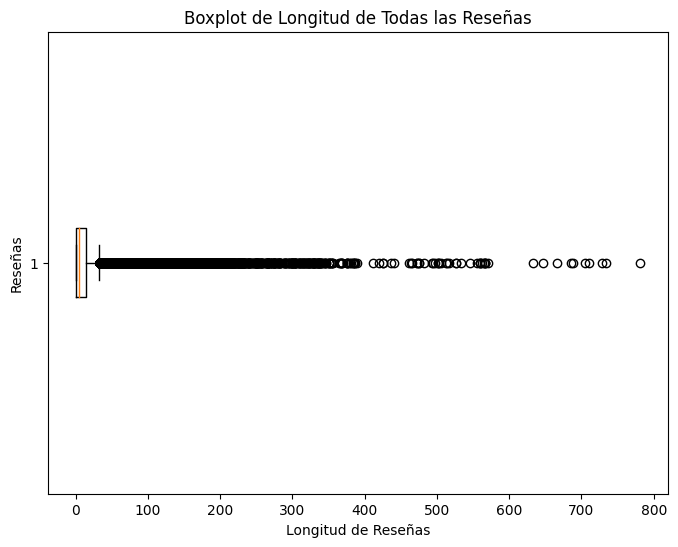

In [20]:
# Boxplot de Longitud de Todas las Reseñas
# Crea una lista con la longitud de todas las reseñas
review_lengths = df['review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 6))
plt.boxplot(review_lengths, vert=False, showfliers=True)
plt.title('Boxplot de Longitud de Todas las Reseñas')
plt.xlabel('Longitud de Reseñas')
plt.ylabel('Reseñas')
plt.show()


#### Los otliers se posicionan a partir de las 700, acordamos que por la cantidad de datos vamos a tomarlos en cuenta.

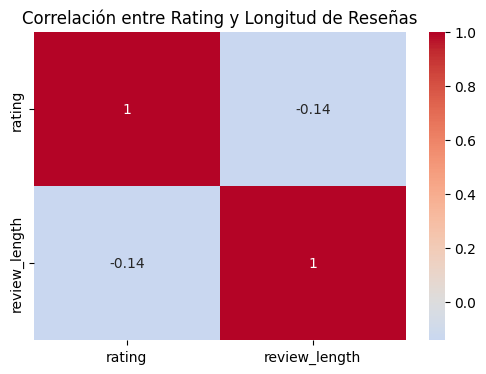

In [24]:
#Correlación entre Rating y Longitud de Reseñas

# Filtra las reseñas no nulas
filtered_reviews = df['review'].notna()

# Calcula la longitud de las reseñas y agregarla al DataFrame
df['review_length'] = df[filtered_reviews]['review'].str.split().apply(len)

# Calcula la correlación entre el rating y la longitud de las reseñas
correlation_matrix = df[filtered_reviews][['rating', 'review_length']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Rating y Longitud de Reseñas')
plt.show()


#### La correlación entre la longitud de las reseñas y la puntuación es débilmente negativa, lo que sugiere que las reseñas más largas tienden a tener puntuaciones ligeramente más bajas, pero la relación no es fuerte.

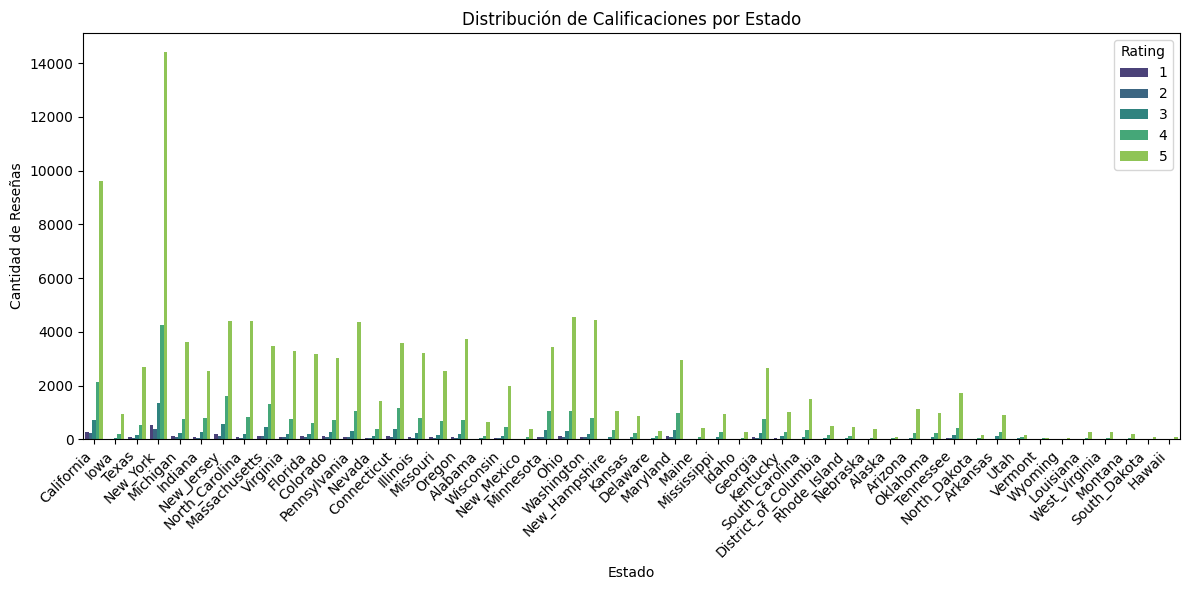

In [26]:
#Distribucion de Calificaciones por Estado
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='estado', hue='rating', palette='viridis')
plt.title('Distribución de Calificaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


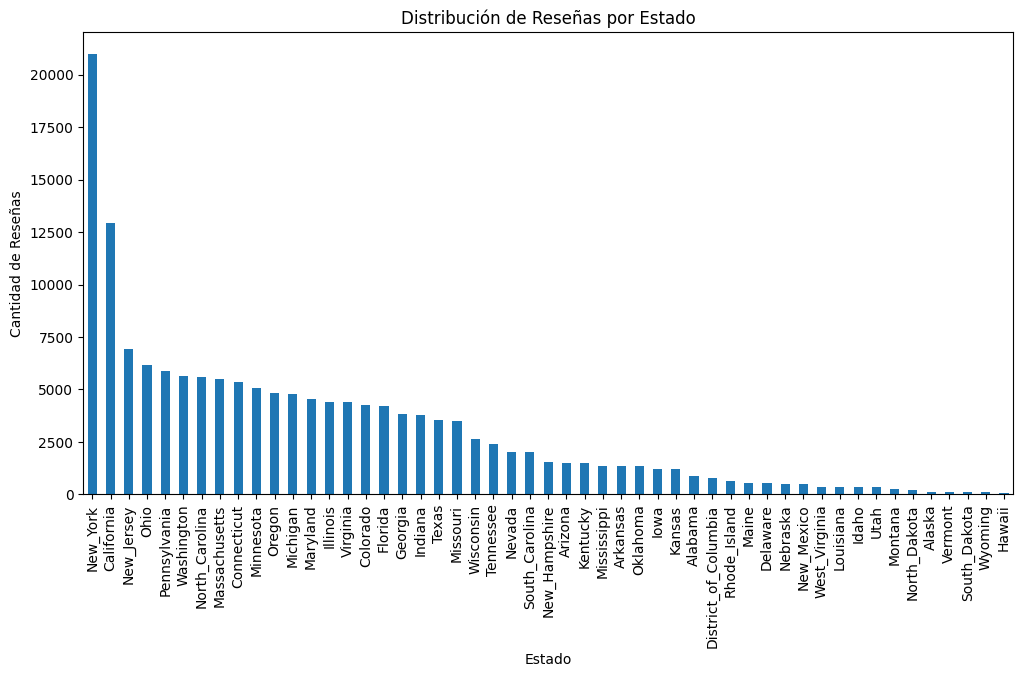

In [12]:
# Contar la cantidad de reseñas por estado
state_counts = df['estado'].value_counts()

plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Distribución de Reseñas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.show()

#### Mayor cantidad en New York tambien con la mayor cantidad de reseñas con puntaje 5 , siguen California , Washington .

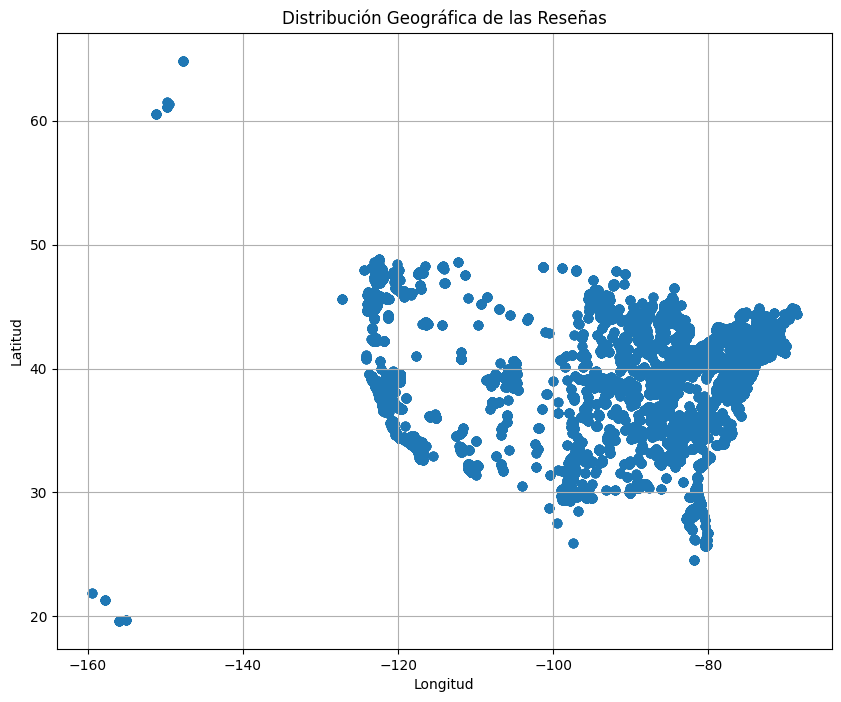

In [27]:
#Otra vista de las calificaciones y la cantidad de reseñas 

# Datos de latitud y longitud en tu DataFrame
latitudes = df['latitude']
longitudes = df['longitude']

# scatter plot 
plt.figure(figsize=(10, 8))
plt.scatter(longitudes, latitudes, alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de las Reseñas')
plt.grid(True)
plt.show()


#### Muestra que la costa Este de EEUU es donde se concentran la mayor cantidad de reseñas . la excepcion seria California.

## Kpi´s

### Distribución de Reviewers según su Categoría:

In [4]:
#Agrupar por Estado y Contar Reseñas: 
state_review_counts = df.groupby('estado')['num_of_reviews'].sum().reset_index()
print(state_review_counts)


                  estado  num_of_reviews
0                Alabama           55329
1                 Alaska            6394
2                Arizona          108408
3               Arkansas          232166
4             California         1214551
5               Colorado          393727
6            Connecticut         1128828
7               Delaware           37698
8   District_of_Columbia           59538
9                Florida         2134104
10               Georgia          878501
11                Hawaii            3740
12                 Idaho           16032
13              Illinois          829243
14               Indiana          352224
15                  Iowa          103531
16                Kansas          116747
17              Kentucky          157140
18             Louisiana           22247
19                 Maine           62067
20              Maryland          497375
21         Massachusetts          577804
22              Michigan          497310
23             M

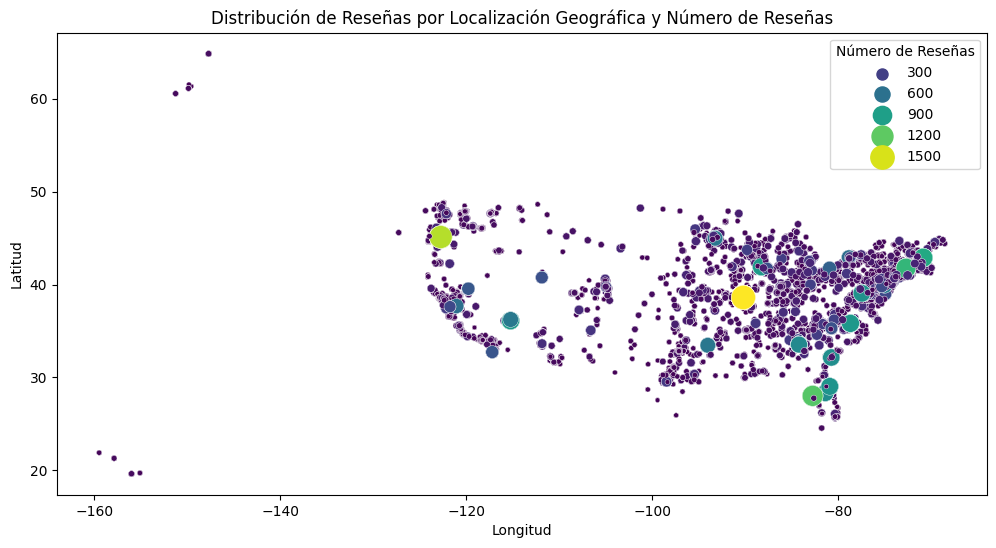

In [5]:
#Visualización de Relación entre Reseñas y Localización: 
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', size='num_of_reviews', sizes=(10, 300), hue='num_of_reviews', palette='viridis')
plt.title('Distribución de Reseñas por Localización Geográfica y Número de Reseñas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Número de Reseñas')
plt.show()


#### Para medir la relación entre la localización geográfica y el número de reseñas para evaluar el potencial de experiencia en diferentes áreas geográficas:

In [6]:
#Agrupar por Usuario y Contar Localizaciones Únicas: 
user_locations = df.groupby('user_id')['estado'].nunique().reset_index()
user_locations.rename(columns={'estado': 'unique_locations'}, inplace=True)
print(user_locations)


             user_id  unique_locations
0       1.000002e+20                 1
1       1.000002e+20                 1
2       1.000003e+20                 1
3       1.000004e+20                 1
4       1.000009e+20                 1
...              ...               ...
137336  1.184461e+20                 1
137337  1.184463e+20                 1
137338  1.184464e+20                 1
137339  1.184465e+20                 1
137340  1.184465e+20                 1

[137341 rows x 2 columns]


In [7]:
#Identificar Usuarios con Más de una Localización: 
users_with_multiple_locations = user_locations[user_locations['unique_locations'] > 1]
print(users_with_multiple_locations)


             user_id  unique_locations
192     1.000330e+20                 2
235     1.000422e+20                 2
278     1.000489e+20                 2
369     1.000664e+20                 2
514     1.000896e+20                 2
...              ...               ...
137064  1.184054e+20                 2
137089  1.184088e+20                 2
137170  1.184224e+20                 2
137203  1.184257e+20                 2
137224  1.184293e+20                 2

[1421 rows x 2 columns]


#### 1421 usuarios que hicieron reseñas de vino en mas de una ubicacion 

           user_id  unique_locations  Unnamed: 0      name_reviewer  rating  \
0     1.000330e+20                 2         230      Alfonso Smith       5   
1     1.000330e+20                 2         231      Alfonso Smith       5   
2     1.000422e+20                 2         277     Matthew Cloues       4   
3     1.000422e+20                 2         278     Matthew Cloues       5   
4     1.000489e+20                 2         323  Donna Rae Pearson       5   
...            ...               ...         ...                ...     ...   
3935  1.184257e+20                 2      152922       Curt Jacques       5   
3936  1.184257e+20                 2      152923       Curt Jacques       5   
3937  1.184257e+20                 2      152924       Curt Jacques       5   
3938  1.184293e+20                 2      152945         Sarah Lima       5   
3939  1.184293e+20                 2      152946         Sarah Lima       4   

                                                 re

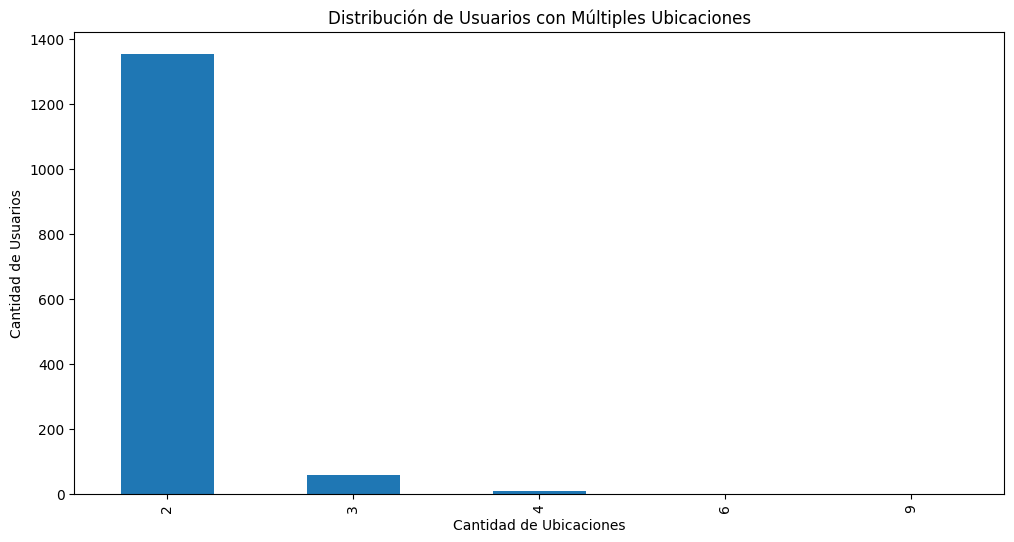

In [13]:
#Para ver las ubicaciones de los usuarios 
# Contar la cantidad de ubicaciones geográficas únicas por usuario
user_locations = df.groupby('user_id')['estado'].nunique().reset_index()
user_locations.columns = ['user_id', 'unique_locations']

# Filtrar usuarios con múltiples ubicaciones geográficas
users_with_multiple_locations = user_locations[user_locations['unique_locations'] > 1]

# Unir la información con el DataFrame original
users_with_locations = pd.merge(users_with_multiple_locations, df, on='user_id')
print(users_with_locations)

plt.figure(figsize=(12, 6))
users_with_multiple_locations['unique_locations'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Usuarios con Múltiples Ubicaciones')
plt.xlabel('Cantidad de Ubicaciones')
plt.ylabel('Cantidad de Usuarios')
plt.show()


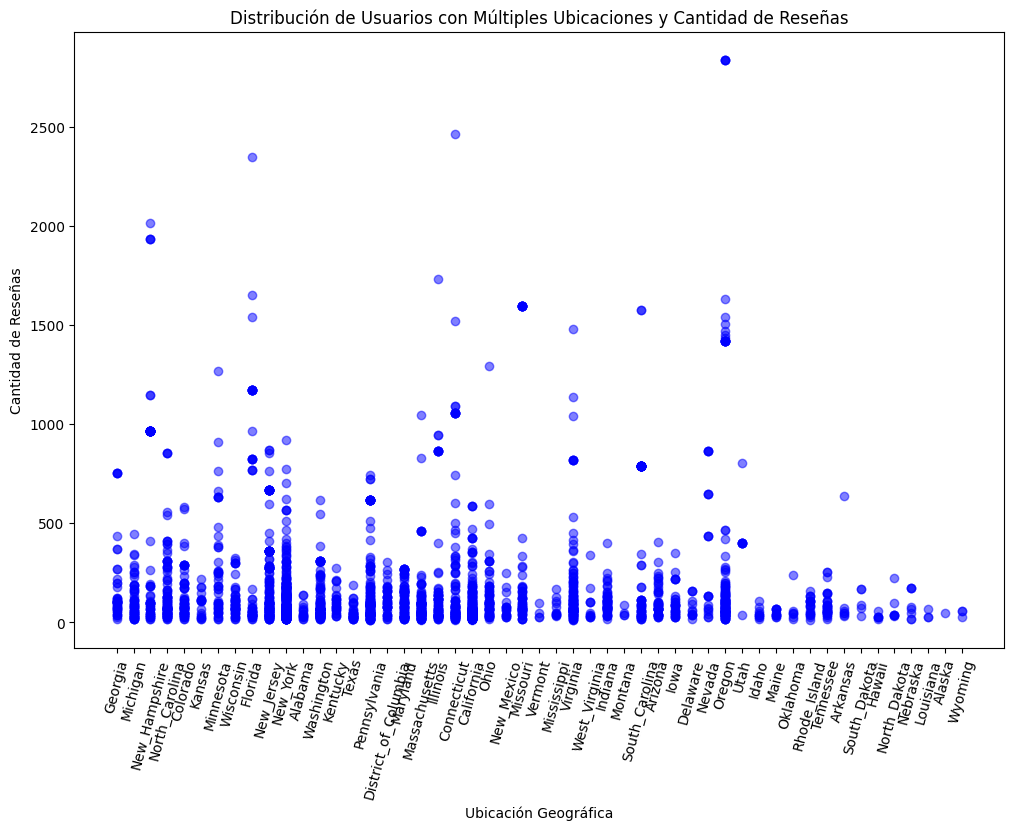

In [18]:
#Para ver la ubicacion geografica
# Contar la cantidad de reseñas por usuario y ubicación geográfica
user_location_reviews = df.groupby(['user_id', 'estado'])['num_of_reviews'].sum().reset_index()

# Filtrar usuarios con múltiples ubicaciones
users_with_multiple_locations = user_location_reviews[user_location_reviews.duplicated('user_id', keep=False)]

# gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(users_with_multiple_locations['estado'], users_with_multiple_locations['num_of_reviews'], color='b', alpha=0.5)
plt.title('Distribución de Usuarios con Múltiples Ubicaciones y Cantidad de Reseñas')
plt.xlabel('Ubicación Geográfica')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=75)
plt.show()


#### El 90% de los usuarios que realizo reseñas en multiples ubicaciones, lo hizo en dos diferentes, el 8% en 3 ubicaciones diferentes y el 2% en 4.Siendo New York y California los que siguen concentrando reseñas.

### Comparativa de Score Promedio de Bodegas o Bares de Vinos

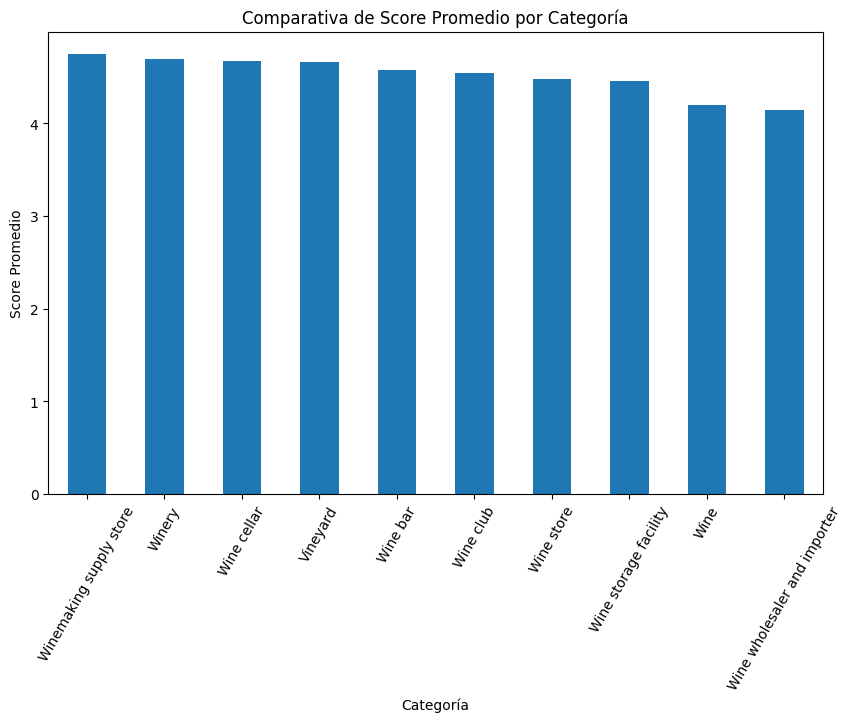

In [26]:
# Calcular el score promedio por categoría
avg_score_by_category = df.groupby('category 1')['rating'].mean()

# Ordenar las categorías por score promedio descendente
avg_score_by_category = avg_score_by_category.sort_values(ascending=False)

avg_score_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Comparativa de Score Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Score Promedio')
plt.xticks(rotation=60)
plt.show()


#### Si bien no hay diferencias significativas las categorias que refieren a tiendas que venden suministros, bodegas, viñedos son las que reciben una puntuacion mas alta con respecto a bares o clubes

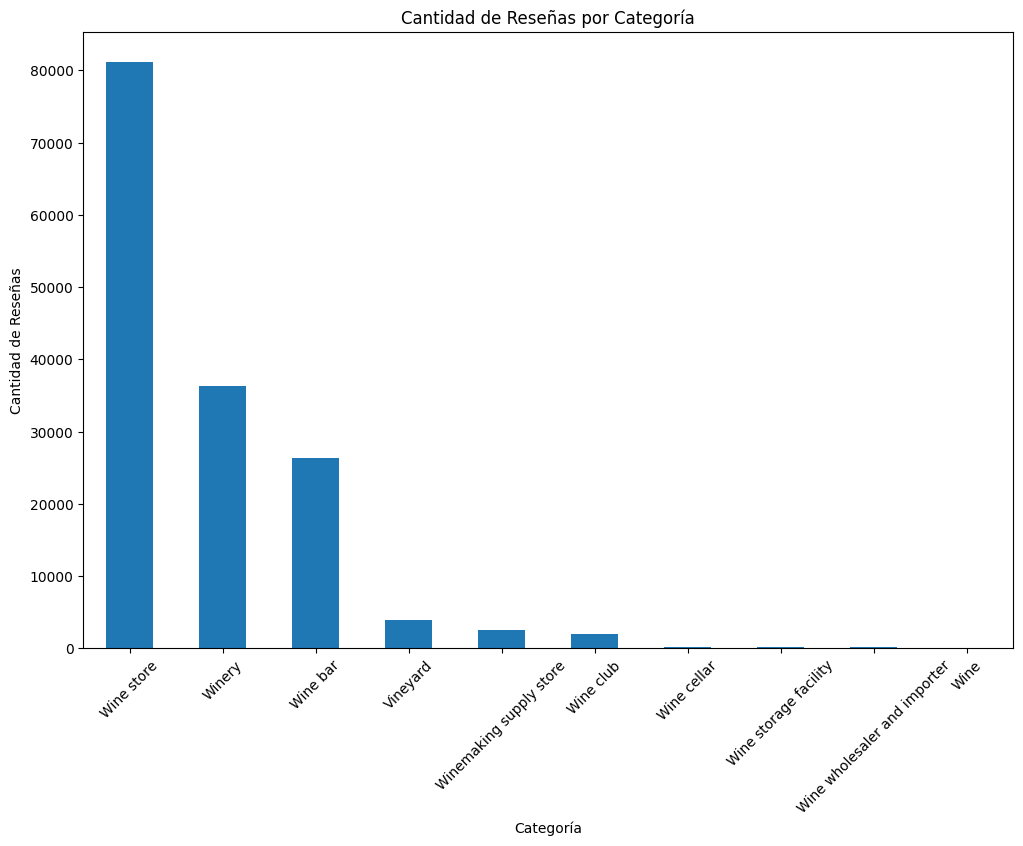

In [21]:
#Gráfico de barras para visualizar la cantidad de reseñas por categoría
# Contar la cantidad de reseñas por categoría
reviews_per_category = df['category 1'].value_counts()

reviews_per_category.plot(kind='bar', figsize=(12, 8))
plt.title('Cantidad de Reseñas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45)
plt.show()


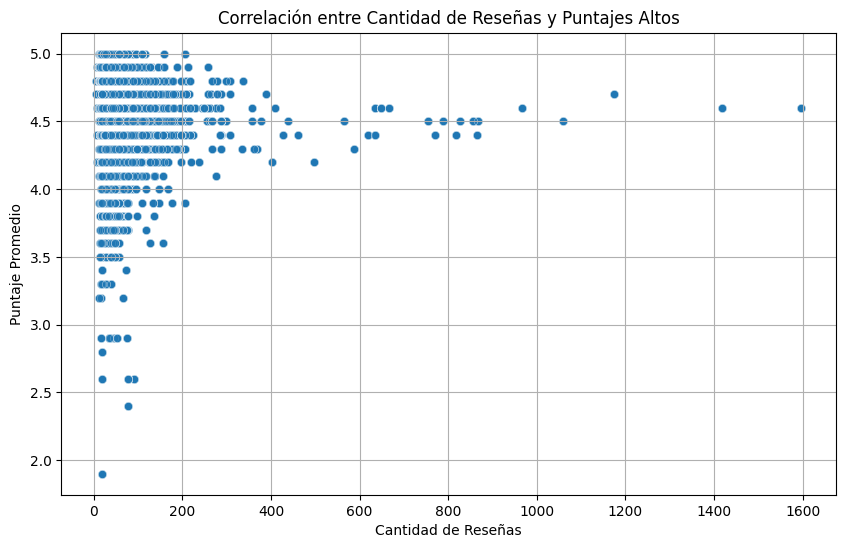

In [24]:
# Crear un gráfico de dispersión para explorar la correlación entre cantidad de reseñas y puntajes altos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_of_reviews', y='avg_rating', alpha=0.5)
plt.title('Correlación entre Cantidad de Reseñas y Puntajes Altos')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Puntaje Promedio')
plt.grid(True)
plt.show()


#### Si tomamos solo el score promedio el analisis esta sesgado, ya que la cantidad de muestra: reseñas, toma importancia. Los puntajes mas altos de score promedio se dan en negocios que no tienen una cantidad significatifa de reseñas como en Winemaking supply store. Por lo que analizando la muestra y el score podemos decir que wine store, winery y wine bar son las que tomamos para el analisis ya que la muestra es significativa. Igual se mantiene la conclusion que categorias que tienen que ver con bodegas o elaboracion reciben mas puntuacion que un bar .

## Volumen de Reseñas por Establecimiento

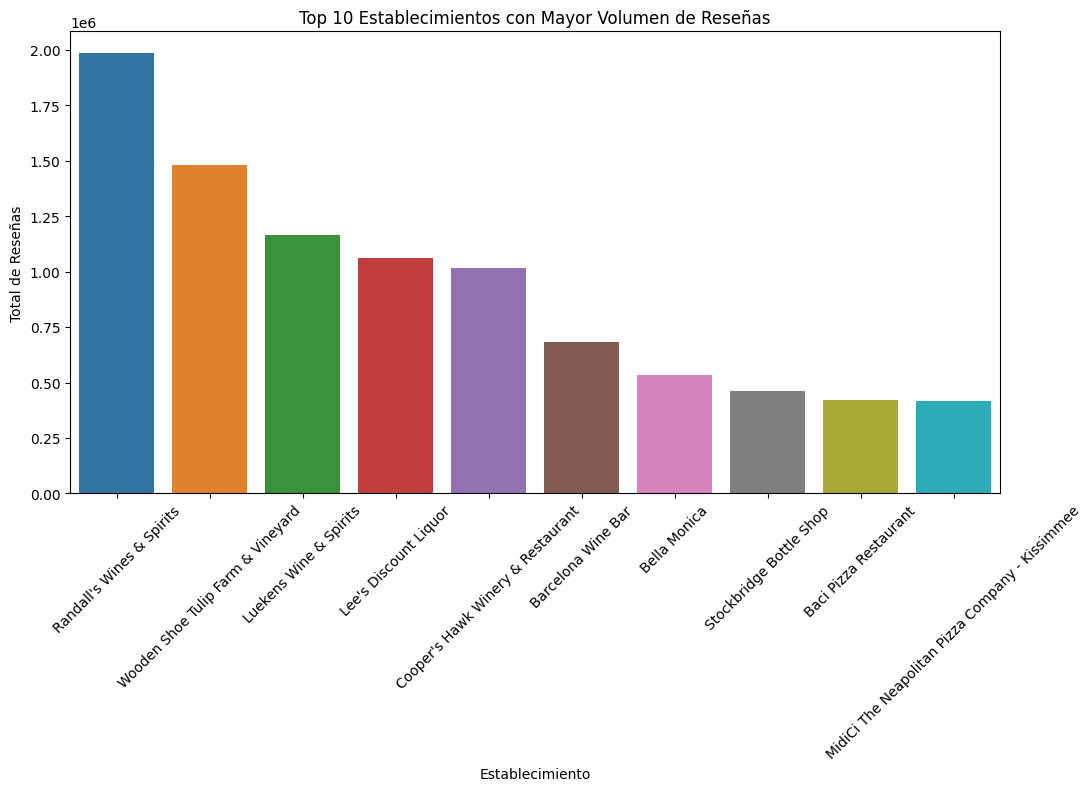

In [2]:
# Obtener los 10 establecimientos con mayor volumen de reseñas
top_10_establishments = df.groupby('name_business')['num_of_reviews'].sum().nlargest(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_establishments.index, y=top_10_establishments.values)
plt.title('Top 10 Establecimientos con Mayor Volumen de Reseñas')
plt.xlabel('Establecimiento')
plt.ylabel('Total de Reseñas')
plt.xticks(rotation=45)
plt.show()


In [44]:
# Obtener los 10 establecimientos con mayor volumen de reseñas
top_10_establishments = df.groupby('name_business').agg({'num_of_reviews': 'sum', 'avg_rating': 'mean', 'category 1': 'first'}).nlargest(10, 'num_of_reviews')

# Mostrar la información de los 10 establecimientos
print(top_10_establishments[['num_of_reviews', 'avg_rating', 'category 1']])


                                                 num_of_reviews  avg_rating  \
name_business                                                                 
Randall's Wines & Spirits                               1983828    4.600000   
Wooden Shoe Tulip Farm & Vineyard                       1480392    4.600000   
Luekens Wine & Spirits                                  1166956    4.700000   
Lee's Discount Liquor                                   1060098    4.533879   
Cooper's Hawk Winery & Restaurant                       1014909    4.453356   
Barcelona Wine Bar                                       682410    4.500000   
Bella Monica                                             534375    4.500000   
Stockbridge Bottle Shop                                  461305    4.500000   
Baci Pizza Restaurant                                    421260    4.500000   
MidiCi The Neapolitan Pizza Company - Kissimmee          415800    4.400000   

                                                 ca

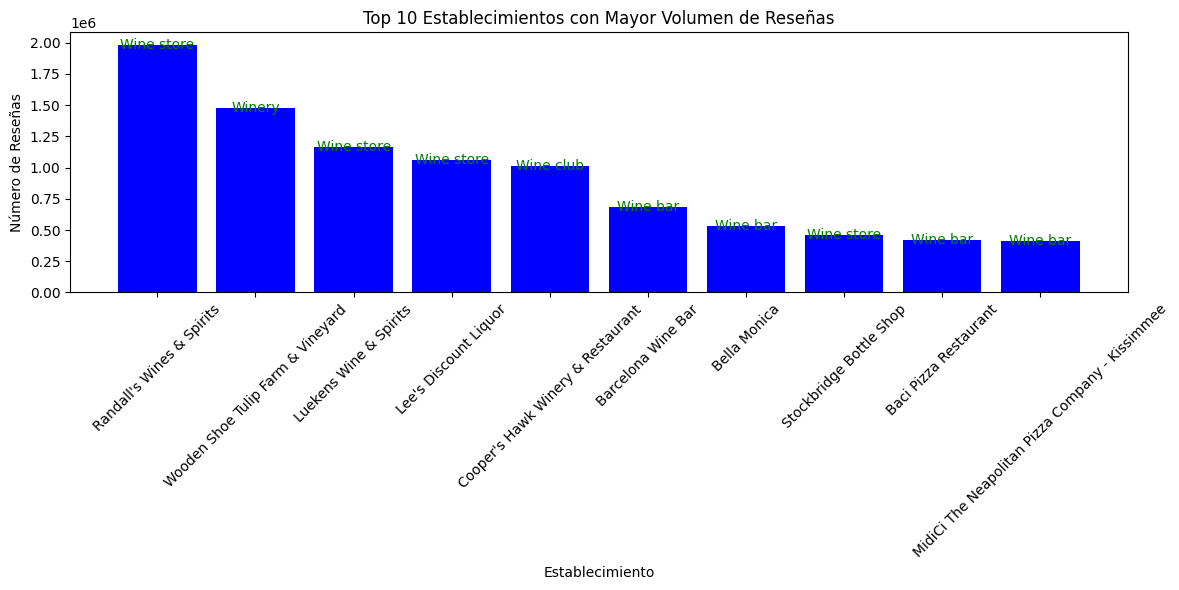

In [49]:
# Obtener los 10 establecimientos con mayor volumen de reseñas
top_10_establishments = df.groupby('name_business').agg({'num_of_reviews': 'sum', 'category 1': 'first'}).nlargest(10, 'num_of_reviews')

# Resetear el índice para tener 'name_business' como columna
top_10_establishments.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_establishments['name_business'], top_10_establishments['num_of_reviews'], color='blue')
plt.xlabel('Establecimiento')
plt.ylabel('Número de Reseñas')
plt.title('Top 10 Establecimientos con Mayor Volumen de Reseñas')
plt.xticks(rotation=45)

# Agregar etiquetas de categoría encima de las barras
for bar, category in zip(bars, top_10_establishments['category 1']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, category, ha='center', va='center', color='green')

plt.tight_layout()
plt.show()


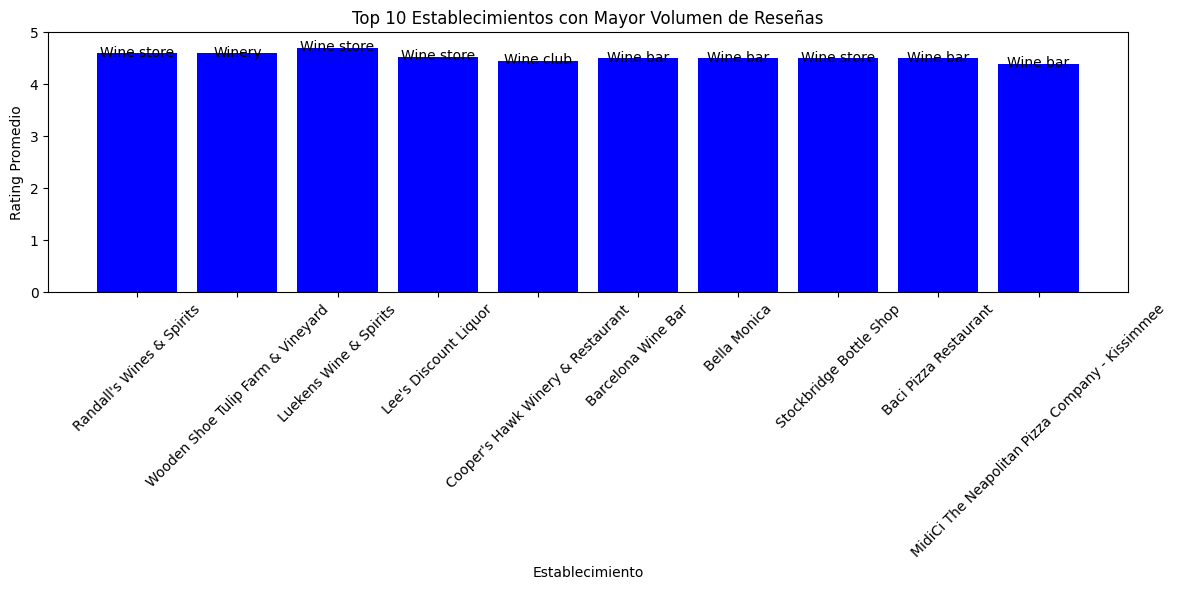

In [54]:
# Obtener los 10 establecimientos con mayor volumen de reseñas
top_10_establishments = df.groupby('name_business').agg({'num_of_reviews': 'sum', 'avg_rating': 'mean', 'category 1': 'first'}).nlargest(10, 'num_of_reviews')

# Resetear el índice para tener 'name_business' como columna
top_10_establishments.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_establishments['name_business'], top_10_establishments['avg_rating'], color='blue')
plt.xlabel('Establecimiento')
plt.ylabel('Rating Promedio')
plt.title('Top 10 Establecimientos con Mayor Volumen de Reseñas')
plt.xticks(rotation=45)

# Agregar etiquetas de categoría encima de las barras
for bar, category in zip(bars, top_10_establishments['category 1']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, category, ha='center', va='center', color='black')

plt.tight_layout()
plt.ylim(0, 5)  # Establecer límites del eje y entre 0 y 5 (rating)
plt.show()


#### De los 10 establecimientos con mayor volumen de reseñas vemos que hay  4 categoria wine store, 4 wine bar , 1 winery y 1 wine club. Los mejor puntuados son los wine store, teniendo el primer, tercer y cuarto puestos en cantidad de reseñas. 